
$$
\begin{aligned}
K_f = \frac{m_f \cdot a}{2 \cdot \theta_1} \\
K_r = \frac{m_r \cdot a}{2 \cdot \theta_2} 
\end{aligned}
$$

$$
\begin{aligned}
A=-\frac{m}{2 l^{2}} \frac{l_{f} K_{f}-l_{r} K_{r}}{K_{f} K_{r}}\\
 =-\frac{1}{l}\left(\frac{\theta_{2}}{a}-\frac{\theta_{1}}{a}\right)
\end{aligned}
$$
$$
\begin{aligned}
\omega_{n} & =\frac{2 l}{V} \sqrt{\frac{K_{f} K_{r}}{m I}} \sqrt{1+A V^{2}}
\end{aligned}
$$

$\frac{r(s)}{\delta(s)}=G_{\delta}^{r}(0) \frac{1+T_{r} s}{1+\frac{2 \zeta s}{\omega_{n}}+\frac{s^{2}}{\omega_{n}^{2}}}$

$G_{\delta}^{r}(0)=\frac{1}{1+A V^{2}} \frac{V}{l}$
$G(0)=\frac{1}{1+A V^{2}} \frac{V}{Nl}$

$$
\zeta=\frac{m\left(l_{f}^{2} K_{f}+l_{r}^{2} K_{r}\right)+I\left(K_{f}+K_{r}\right)}{2 l \sqrt{m I K_{f} K_{r}\left(1+A V^{2}\right)}}
$$

$T_{r}=\frac{m l_{f} V}{2 l K_{r}}$

$$
\begin{gathered}
G_{\delta}^{\beta}(0)=\frac{1-\frac{m}{2 l} \frac{l_{f}}{l_{r} K_{r}} V^{2}}{1+A V^{2}} \frac{l_{r}}{l} 
\end{gathered}
$$

$$
\begin{aligned}
K_f = \frac{m_f \cdot a}{2 \cdot \theta_1}
K_r = \frac{m_r \cdot a}{2 \cdot \theta_2}
A = -\frac{1}{l} \left(\frac{\theta_2}{a} - \frac{\theta_1}{a} \right)
\omega_n = \frac{2 l}{V} \sqrt{\frac{K_f K_r}{m I}} \sqrt{1 + A V^{2}}
\end{aligned}
$$


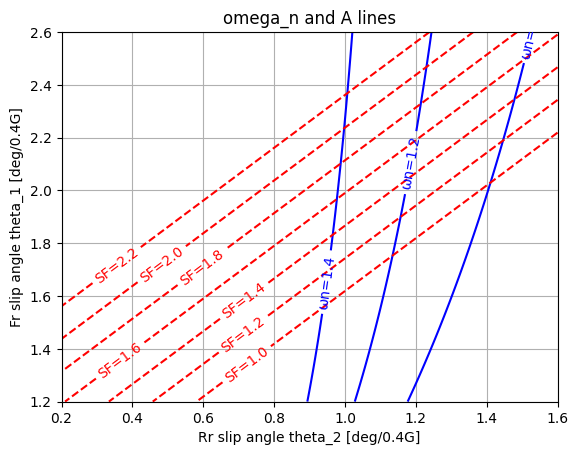

In [36]:
import numpy as np
import matplotlib.pyplot as plt

a = 4.0  # [m/s^2]
mf = 1000  # [kg]
mr = 700  # [kg]
l = 2.7  # [m] (2700mm -> m)
I = 2650  # [kgm^2]
V = 120 / 3.6  # [m/s] (120km/h -> m/s)
m = mf + mr

theta_1 = np.linspace(1.2/180*np.pi, 2.6/180*np.pi, 100)  # [deg/0.4G]
theta_2 = np.linspace(0.2/180*np.pi, 1.6/180*np.pi, 100)  # [deg/0.4G]

THETA_1, THETA_2 = np.meshgrid(theta_1, theta_2)

K_f = (mf * a) / (2 * THETA_1)
K_r = (mr * a) / (2 * THETA_2)

A = -(1/l) * (THETA_2/a - THETA_1/a)
omega_n = np.nan_to_num((2 * l / V) * np.sqrt((K_f * K_r) / (m * I)) * np.sqrt(1 + A * V**2), nan=0.0, posinf=0.0, neginf=0.0)


omega_n_lines = [x * 2 * np.pi for x in [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2]]
A_lines = [x * 10**(-3) for x in [1.0, 1.2, 1.4, 1.6 ,1.8, 2.0, 2.2]]



fig, ax = plt.subplots()

# ラベルのフォーマットをカスタマイズする関数
def format_omega_n_label(x):
    return f"ωn={x / 2 / np.pi:.1f}"

def format_A_label(x):
    return f"SF={x / 10**(-3):.1f}"


label_positions = [(10, 0), (10, 0), (10, 0)]  # ラベルの位置を指定する座標 (x, y)

for omega_n_line, pos in zip(omega_n_lines, label_positions):
    CS = ax.contour(THETA_2 * 180/np.pi, THETA_1 * 180/np.pi, omega_n, levels=[omega_n_line], colors='blue', linestyles='solid')
    ax.clabel(CS, inline=1, fontsize=10, fmt=format_omega_n_label, manual=[pos])

for A_line in A_lines:
    CS = ax.contour(THETA_2 * 180/np.pi, THETA_1 * 180/np.pi, A, levels=[A_line], colors='red', linestyles='dashed')
    ax.clabel(CS, inline=1, fontsize=10, fmt=format_A_label)

        
ax.set_xlabel('Rr slip angle theta_2 [deg/0.4G]')
ax.set_ylabel('Fr slip angle theta_1 [deg/0.4G]')
ax.set_title('omega_n and A lines')
ax.grid()

plt.show()

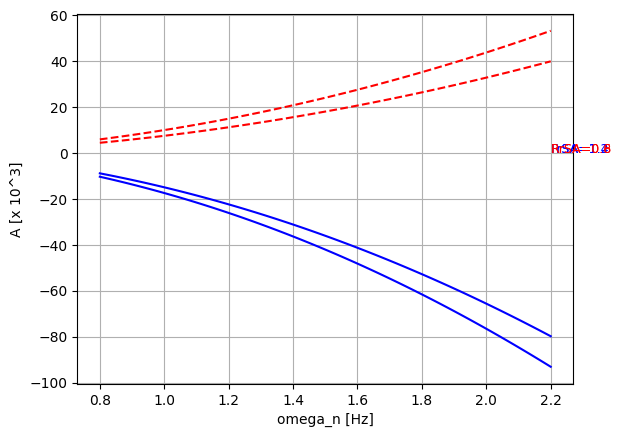

In [51]:

theta_1_values = np.array([1.2, 1.4]) * np.pi / 180
theta_2_values = np.array([0.6, 0.8]) * np.pi / 180

omega_n_range = np.linspace(0.8, 2.2, 100) * 2 * np.pi

fig, ax = plt.subplots()
for theta_1 in theta_1_values:
    K_f = (mf * a) / (2 * theta_1)
    A_values = []
    for omega_n in omega_n_range:
        K_r = (m * I * omega_n ** 2) / (4 * l ** 2 * K_f)
        A = -(1 / l) * ((2 * K_r) / (mr * a) - theta_1 / a)
        A_values.append(A)
    line, = ax.plot(omega_n_range / (2 * np.pi), [A * 10**3 for A in A_values], color='blue')
    label = f'FrSA={theta_1 * 180 / np.pi:.1f}'
    ax.text(omega_n_range[-1] / (2 * np.pi), A_values[-1], label, fontsize=9, color=line.get_color())

for theta_2 in theta_2_values:
    K_r = (mr * a) / (2 * theta_2)
    A_values = []
    for omega_n in omega_n_range:
        K_f = (m * I * omega_n ** 2) / (4 * l ** 2 * K_r)
        A = -(1 / l) * (theta_2 / a - (2 * K_f) / (mf * a))
        A_values.append(A)
    line, = ax.plot(omega_n_range / (2 * np.pi), [A * 10**3 for A in A_values], linestyle='--', color='red')
    label = f'RrSA={theta_2 * 180 / np.pi:.1f}'
    ax.text(omega_n_range[-1] / (2 * np.pi), A_values[-1], label, fontsize=9, color=line.get_color())


ax.set_xlabel('omega_n [Hz]')
ax.set_ylabel('A [x 10^3]')
ax.grid()

plt.show()

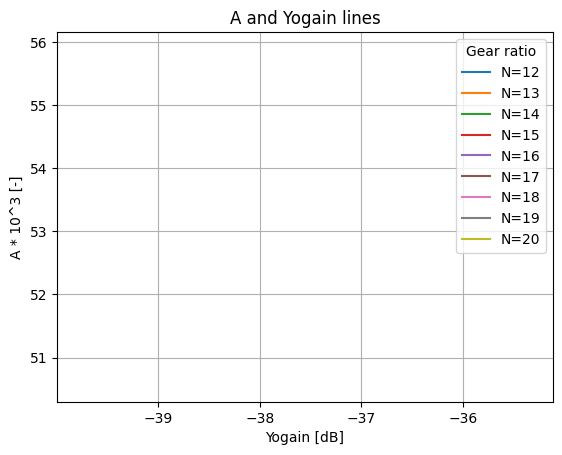

In [53]:

# ギア比の範囲を指定
N_values = range(12, 21)

fig, ax = plt.subplots()

# ラベルのフォーマットをカスタマイズする関数
def format_G_label(x):
    return f"G={x:.1f} dB"

def format_A_label(x):
    return f"{x:.1f} x 10^3"
for N in N_values:
    G_0 = (V / (N * l)) / (1 + A * V ** 2)
    G_dB = 20 * np.log10(G_0)
    ax.plot(G_dB, A * 10 ** 3, label=f"N={N}")


ax.set_xlabel('Yogain [dB]')
ax.set_ylabel('A * 10^3 [-]')
ax.set_title('A and Yogain lines')
ax.grid()
ax.legend(title="Gear ratio")

plt.show()